# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
L = pd.read_csv("Loan.csv")
L.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loading the data set into “L” variable and processing the first 5 rows. 

# Exploratory Data Analysis(EDA)

In [3]:
# We will drop Loan_ID column because it has no effect on dataset
L.drop('Loan_ID', inplace = True, axis = 1)

In [4]:
L.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#checking the dimension of data
L.shape

(614, 12)

In [6]:
L.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
L.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
L.isnull().sum().sum()

149

In [10]:
L.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

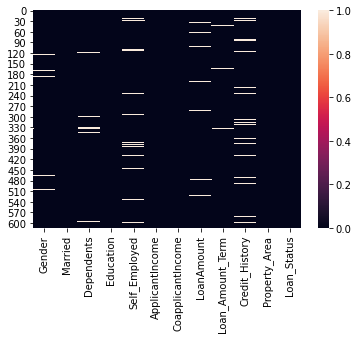

In [11]:
#lets visualize it using heatmap
sns.heatmap(L.isnull())

In [12]:
L.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
#Separating Numerical and Categorical columns

#Checking for categorical columns
categorical_col = []
for i in L.dtypes.index:
    if L.dtypes[i] == "object":
        categorical_col.append(i)
        
print("Categorical Columns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in L.dtypes.index:
    if L.dtypes[i]!= "object":
        numerical_col.append(i)
        
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




In [14]:
# Checking number of unique values in each column
L.nunique().to_frame("No. of unique values")

,No. of unique values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


# Data Visualization

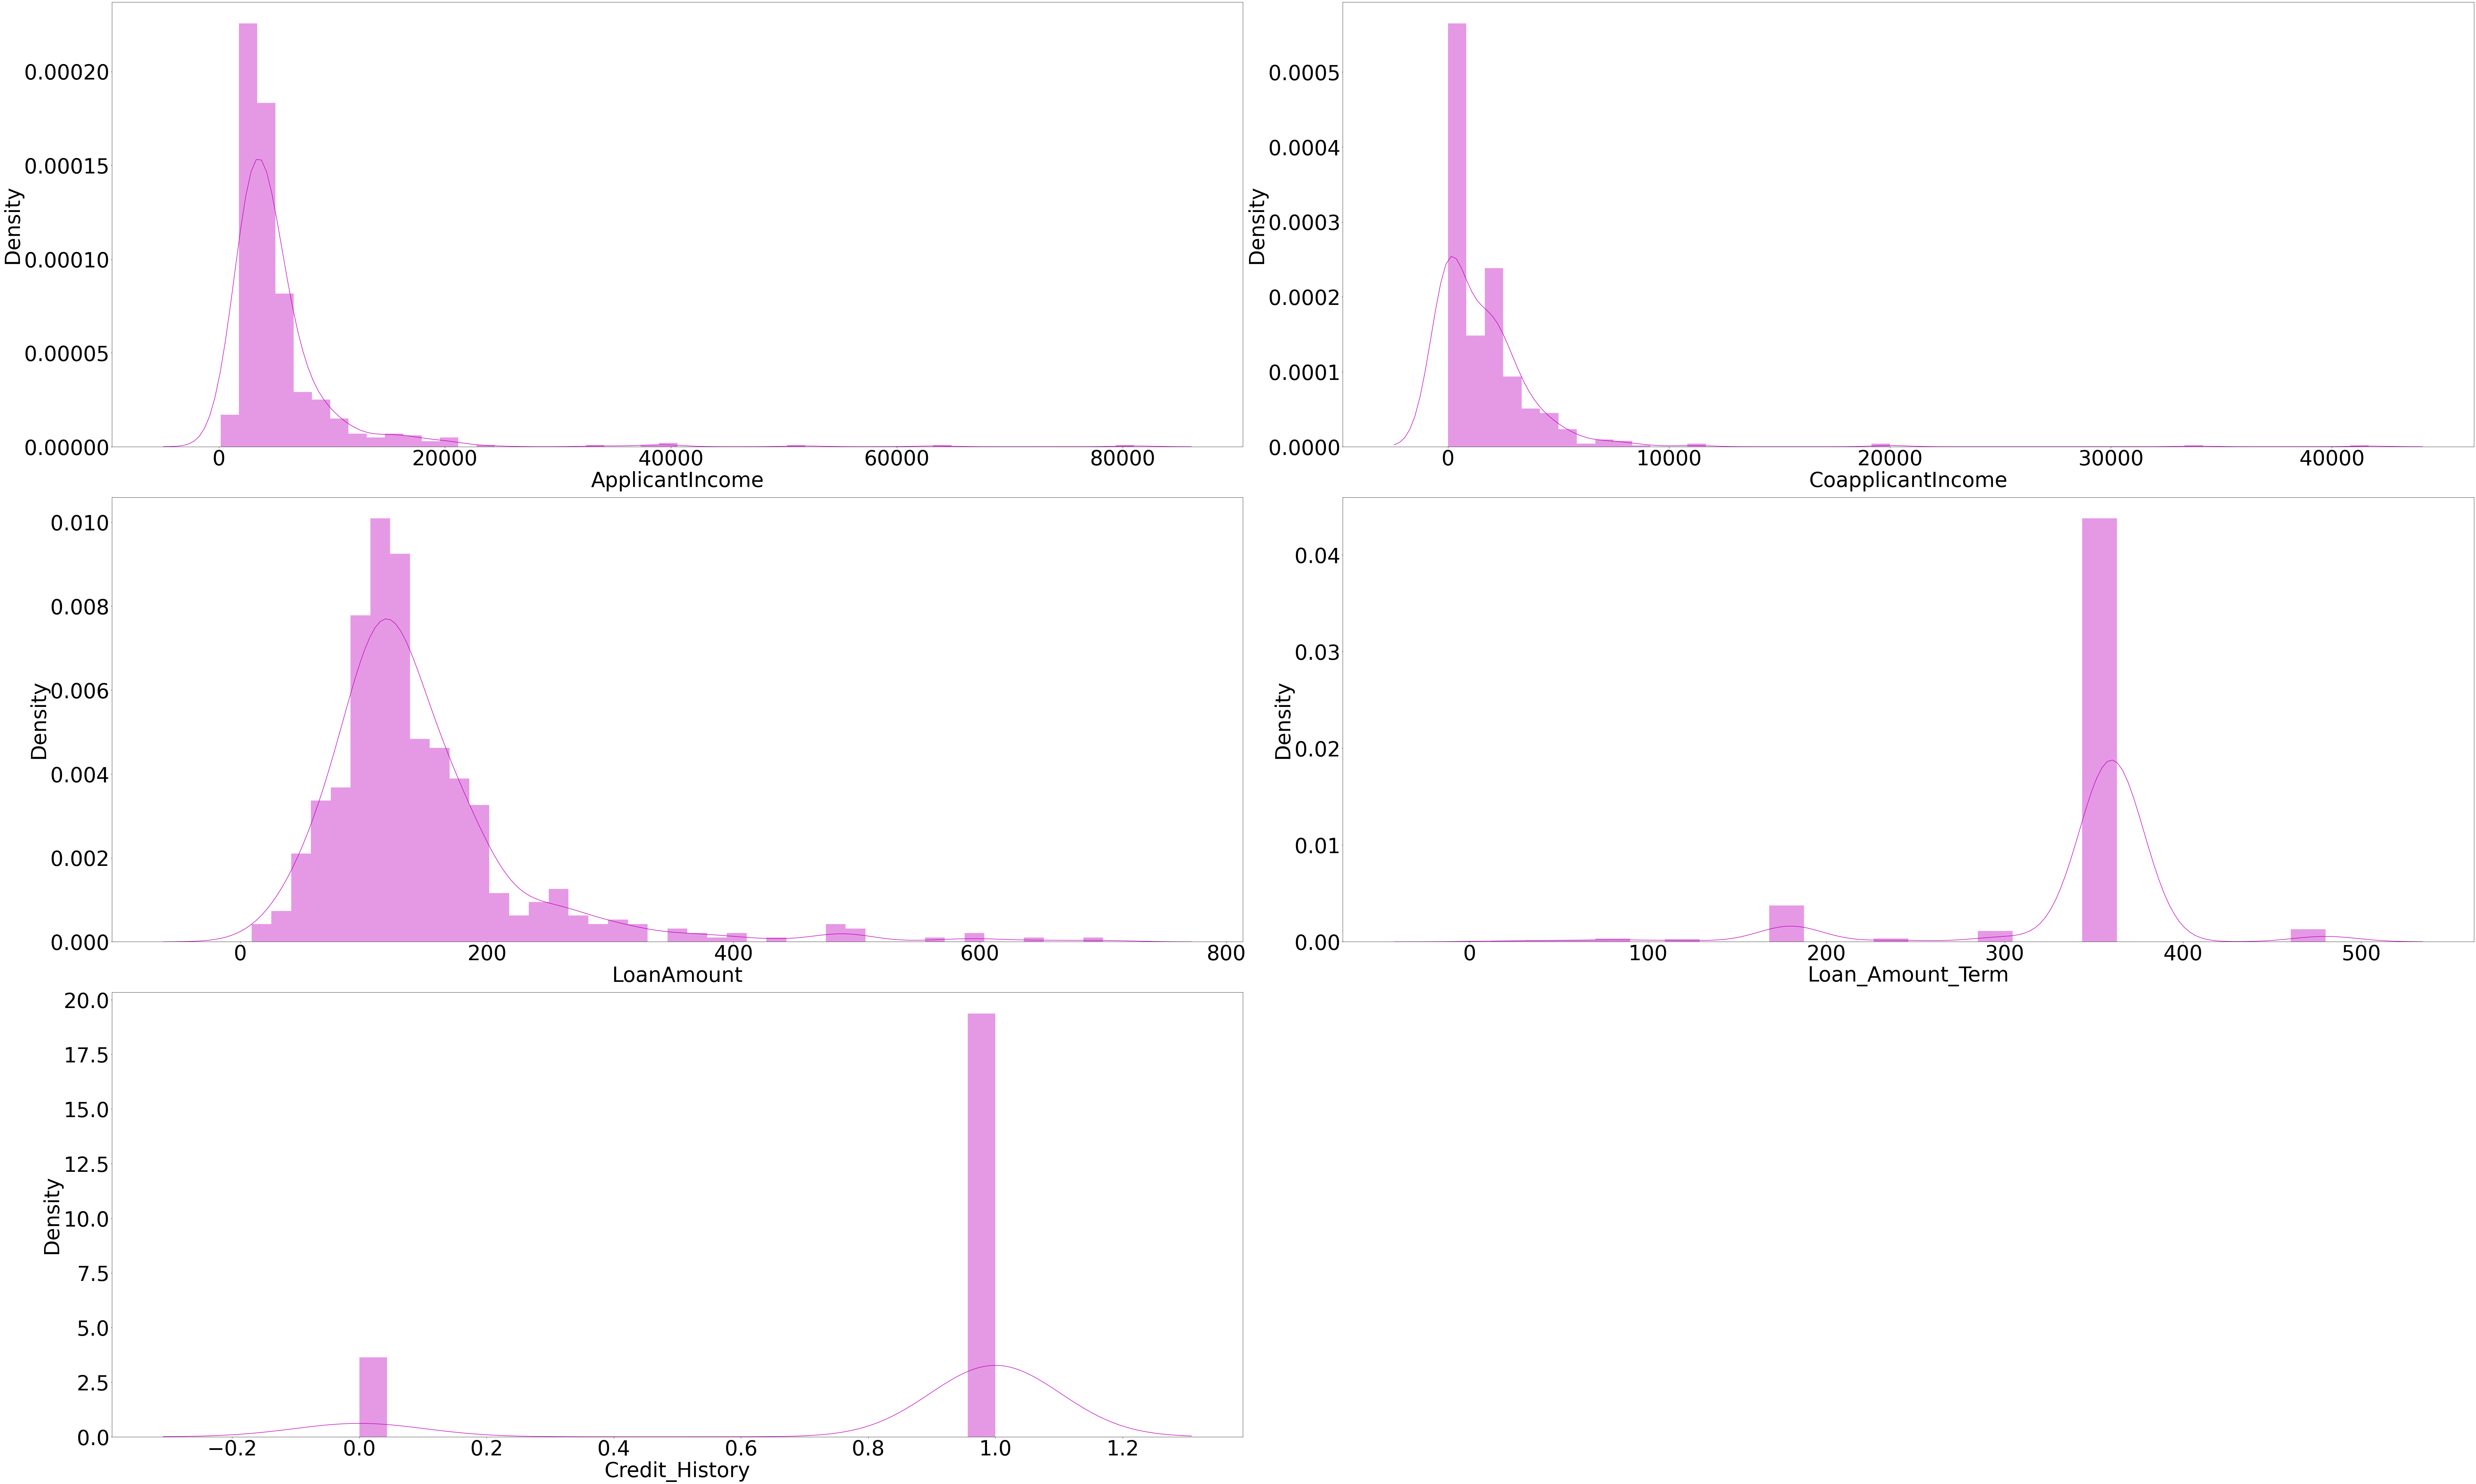

In [15]:
#let's check how the data has been distributed in remaining column
from socket import socket
plt.figure(figsize = (100, 60), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=5:
        ax = plt.subplot(3, 2, plotnumber)
        sns.distplot(L[col], color = "m")
        plt.xlabel(col, fontsize = 60)
        plt.ylabel('Density', fontsize = 60)
        plt.yticks(rotation = 0, fontsize = 60)
        plt.xticks(rotation = 0, fontsize = 60)
    plotnumber+=1
plt.tight_layout()

# Checking for Outliers

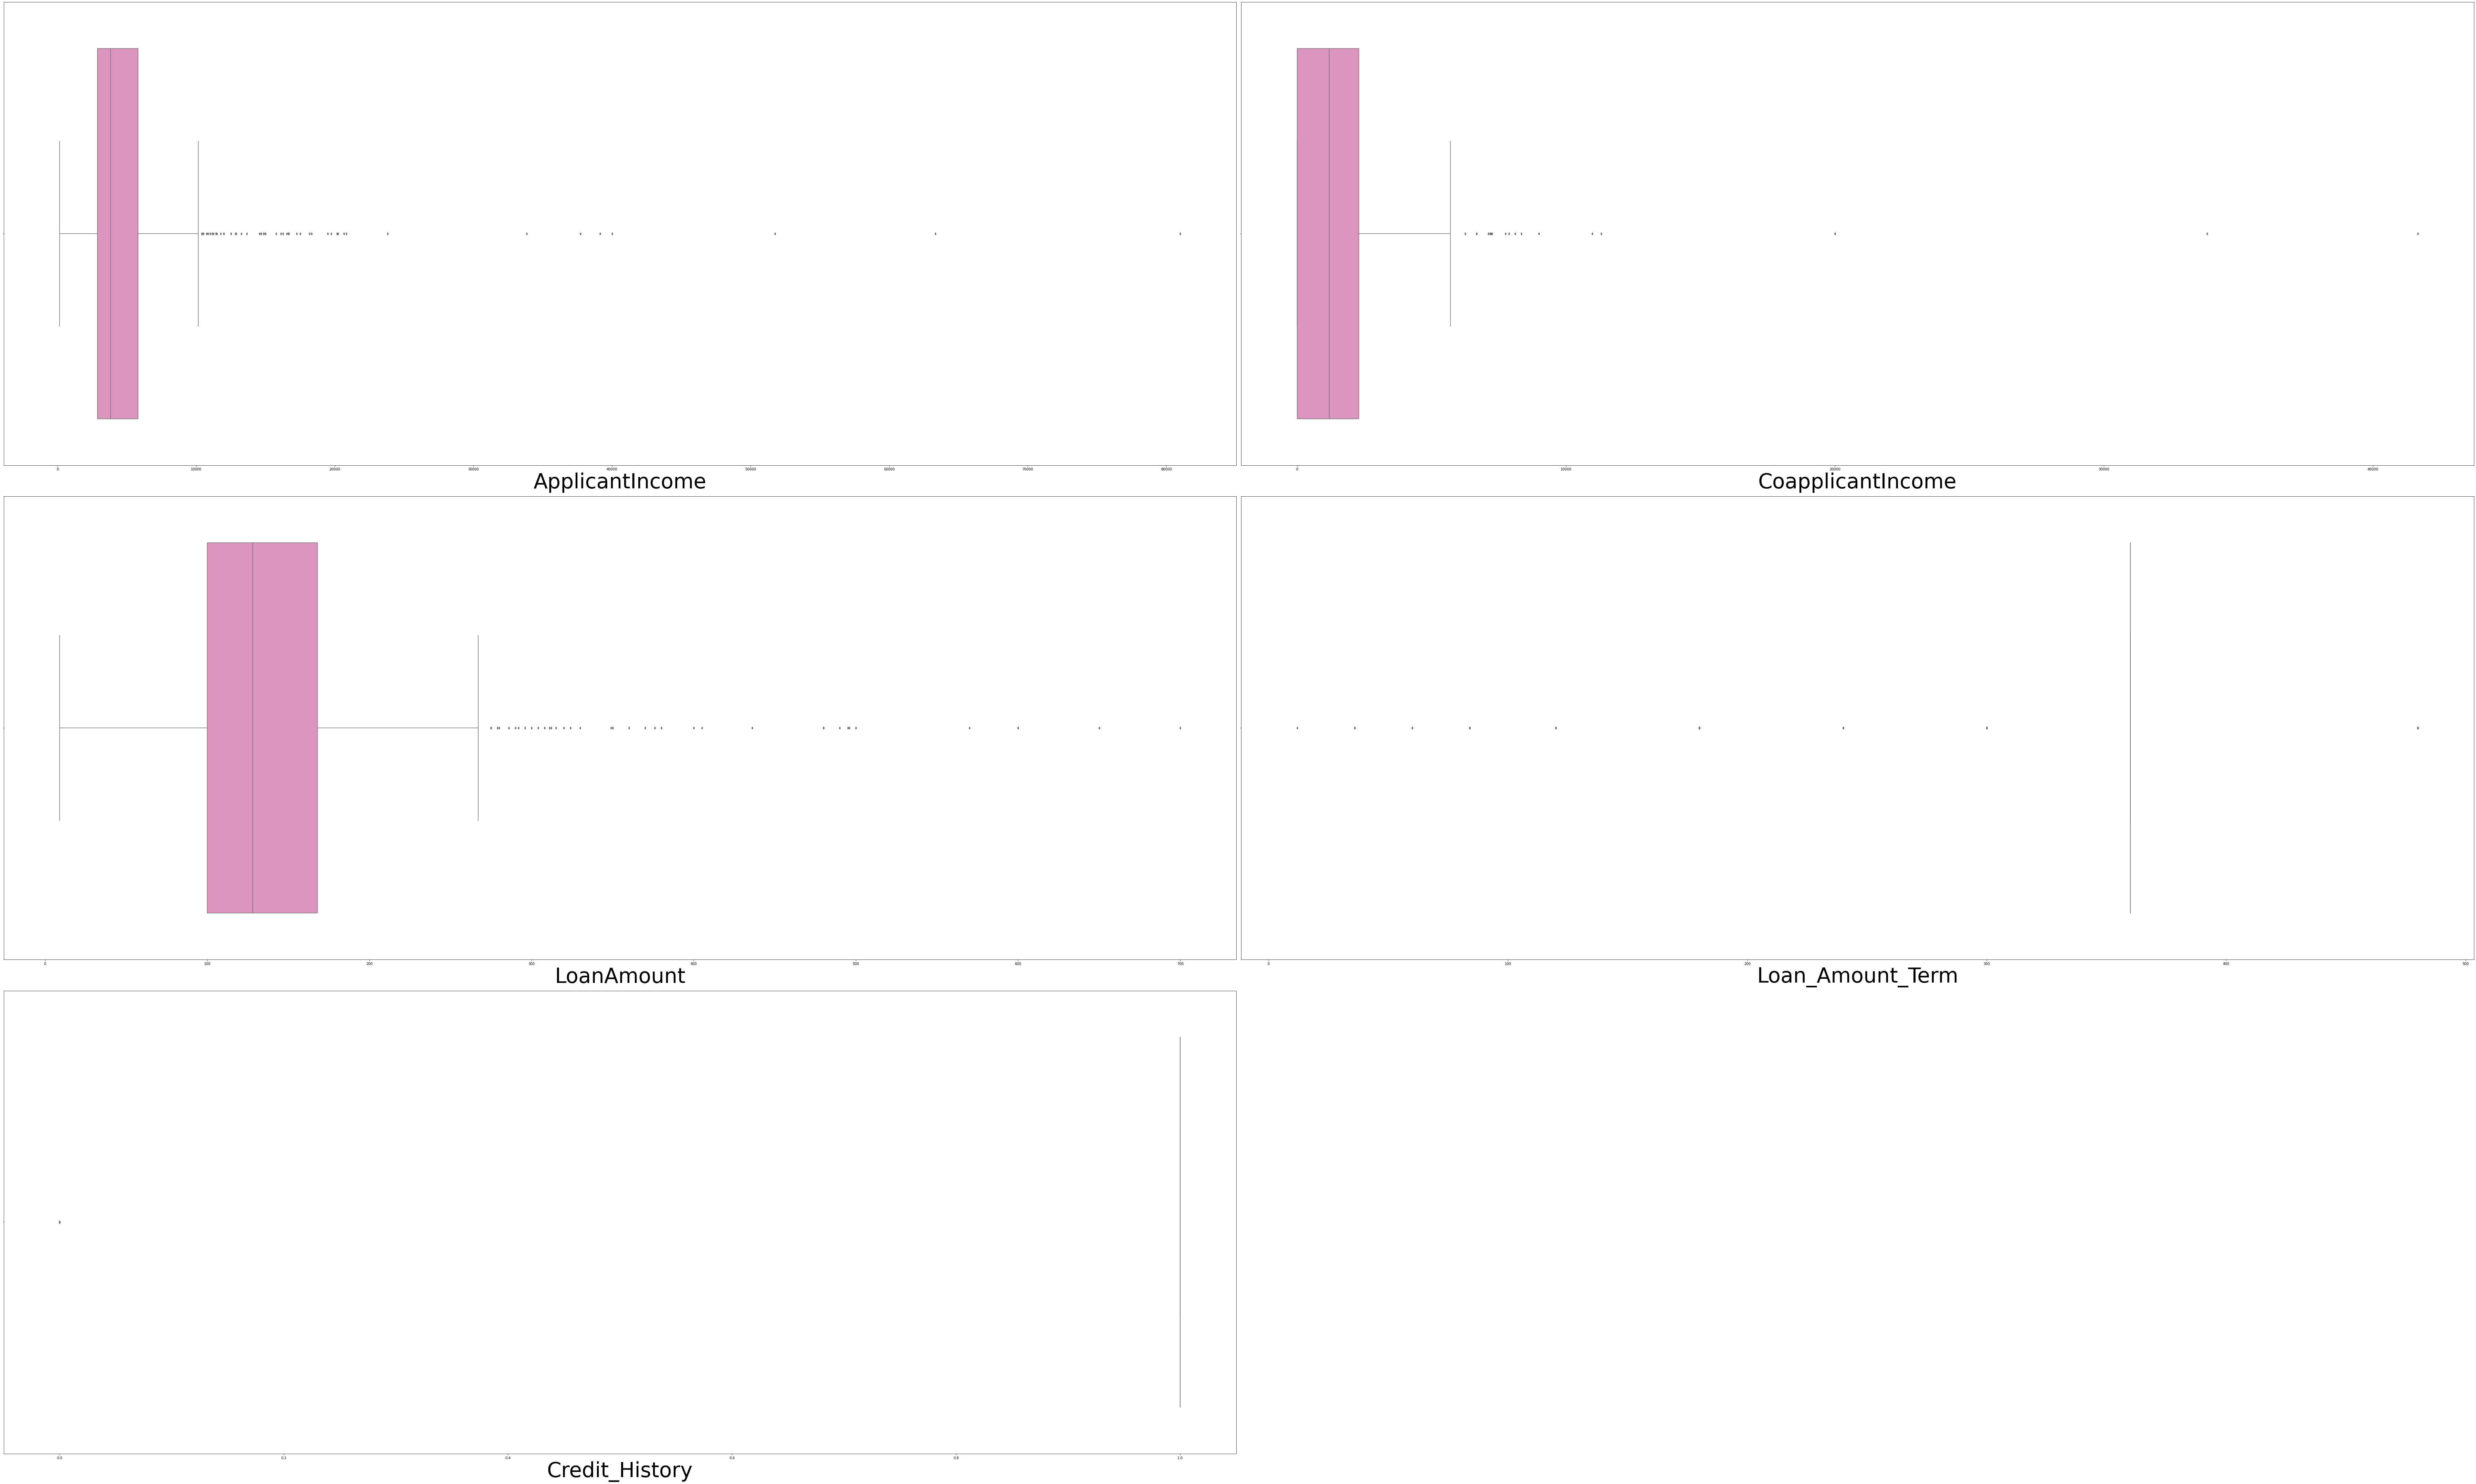

In [16]:
# Lets check the outliers by plotting boxplot

plt.figure(figsize = (100, 60), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=5:
        ax = plt.subplot(3, 2, plotnumber)
        sns.boxplot(L[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 60)
        plt.yticks(rotation = 0, fontsize = 60)
    plotnumber+=1
plt.tight_layout()

# Checking for skweness

In [17]:
L.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

# Removing Skweness

In [18]:
# Removing skewness using cuberoot method
L['ApplicantIncome'] = np.cbrt(L['ApplicantIncome'])
L['CoapplicantIncome'] = np.cbrt(L['CoapplicantIncome'])
L['LoanAmount'] = np.cbrt(L['LoanAmount'])
L['Loan_Amount_Term'] = np.cbrt(L['Loan_Amount_Term'])
L['Credit_History'] = np.cbrt(L['Credit_History'])

In [19]:
L.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.837614
Loan_Amount_Term    -3.528044
Credit_History      -1.882361
dtype: float64

In [20]:
# Removing skewness again using cuberoot method
L['ApplicantIncome'] = np.cbrt(L['ApplicantIncome'])
L['Loan_Amount_Term'] = np.cbrt(L['Loan_Amount_Term'])
L['Credit_History'] = np.cbrt(L['Credit_History'])

In [21]:
# Checking skewness again
L.skew()

ApplicantIncome      1.030738
CoapplicantIncome    0.196726
LoanAmount           0.837614
Loan_Amount_Term    -4.281052
Credit_History      -1.882361
dtype: float64

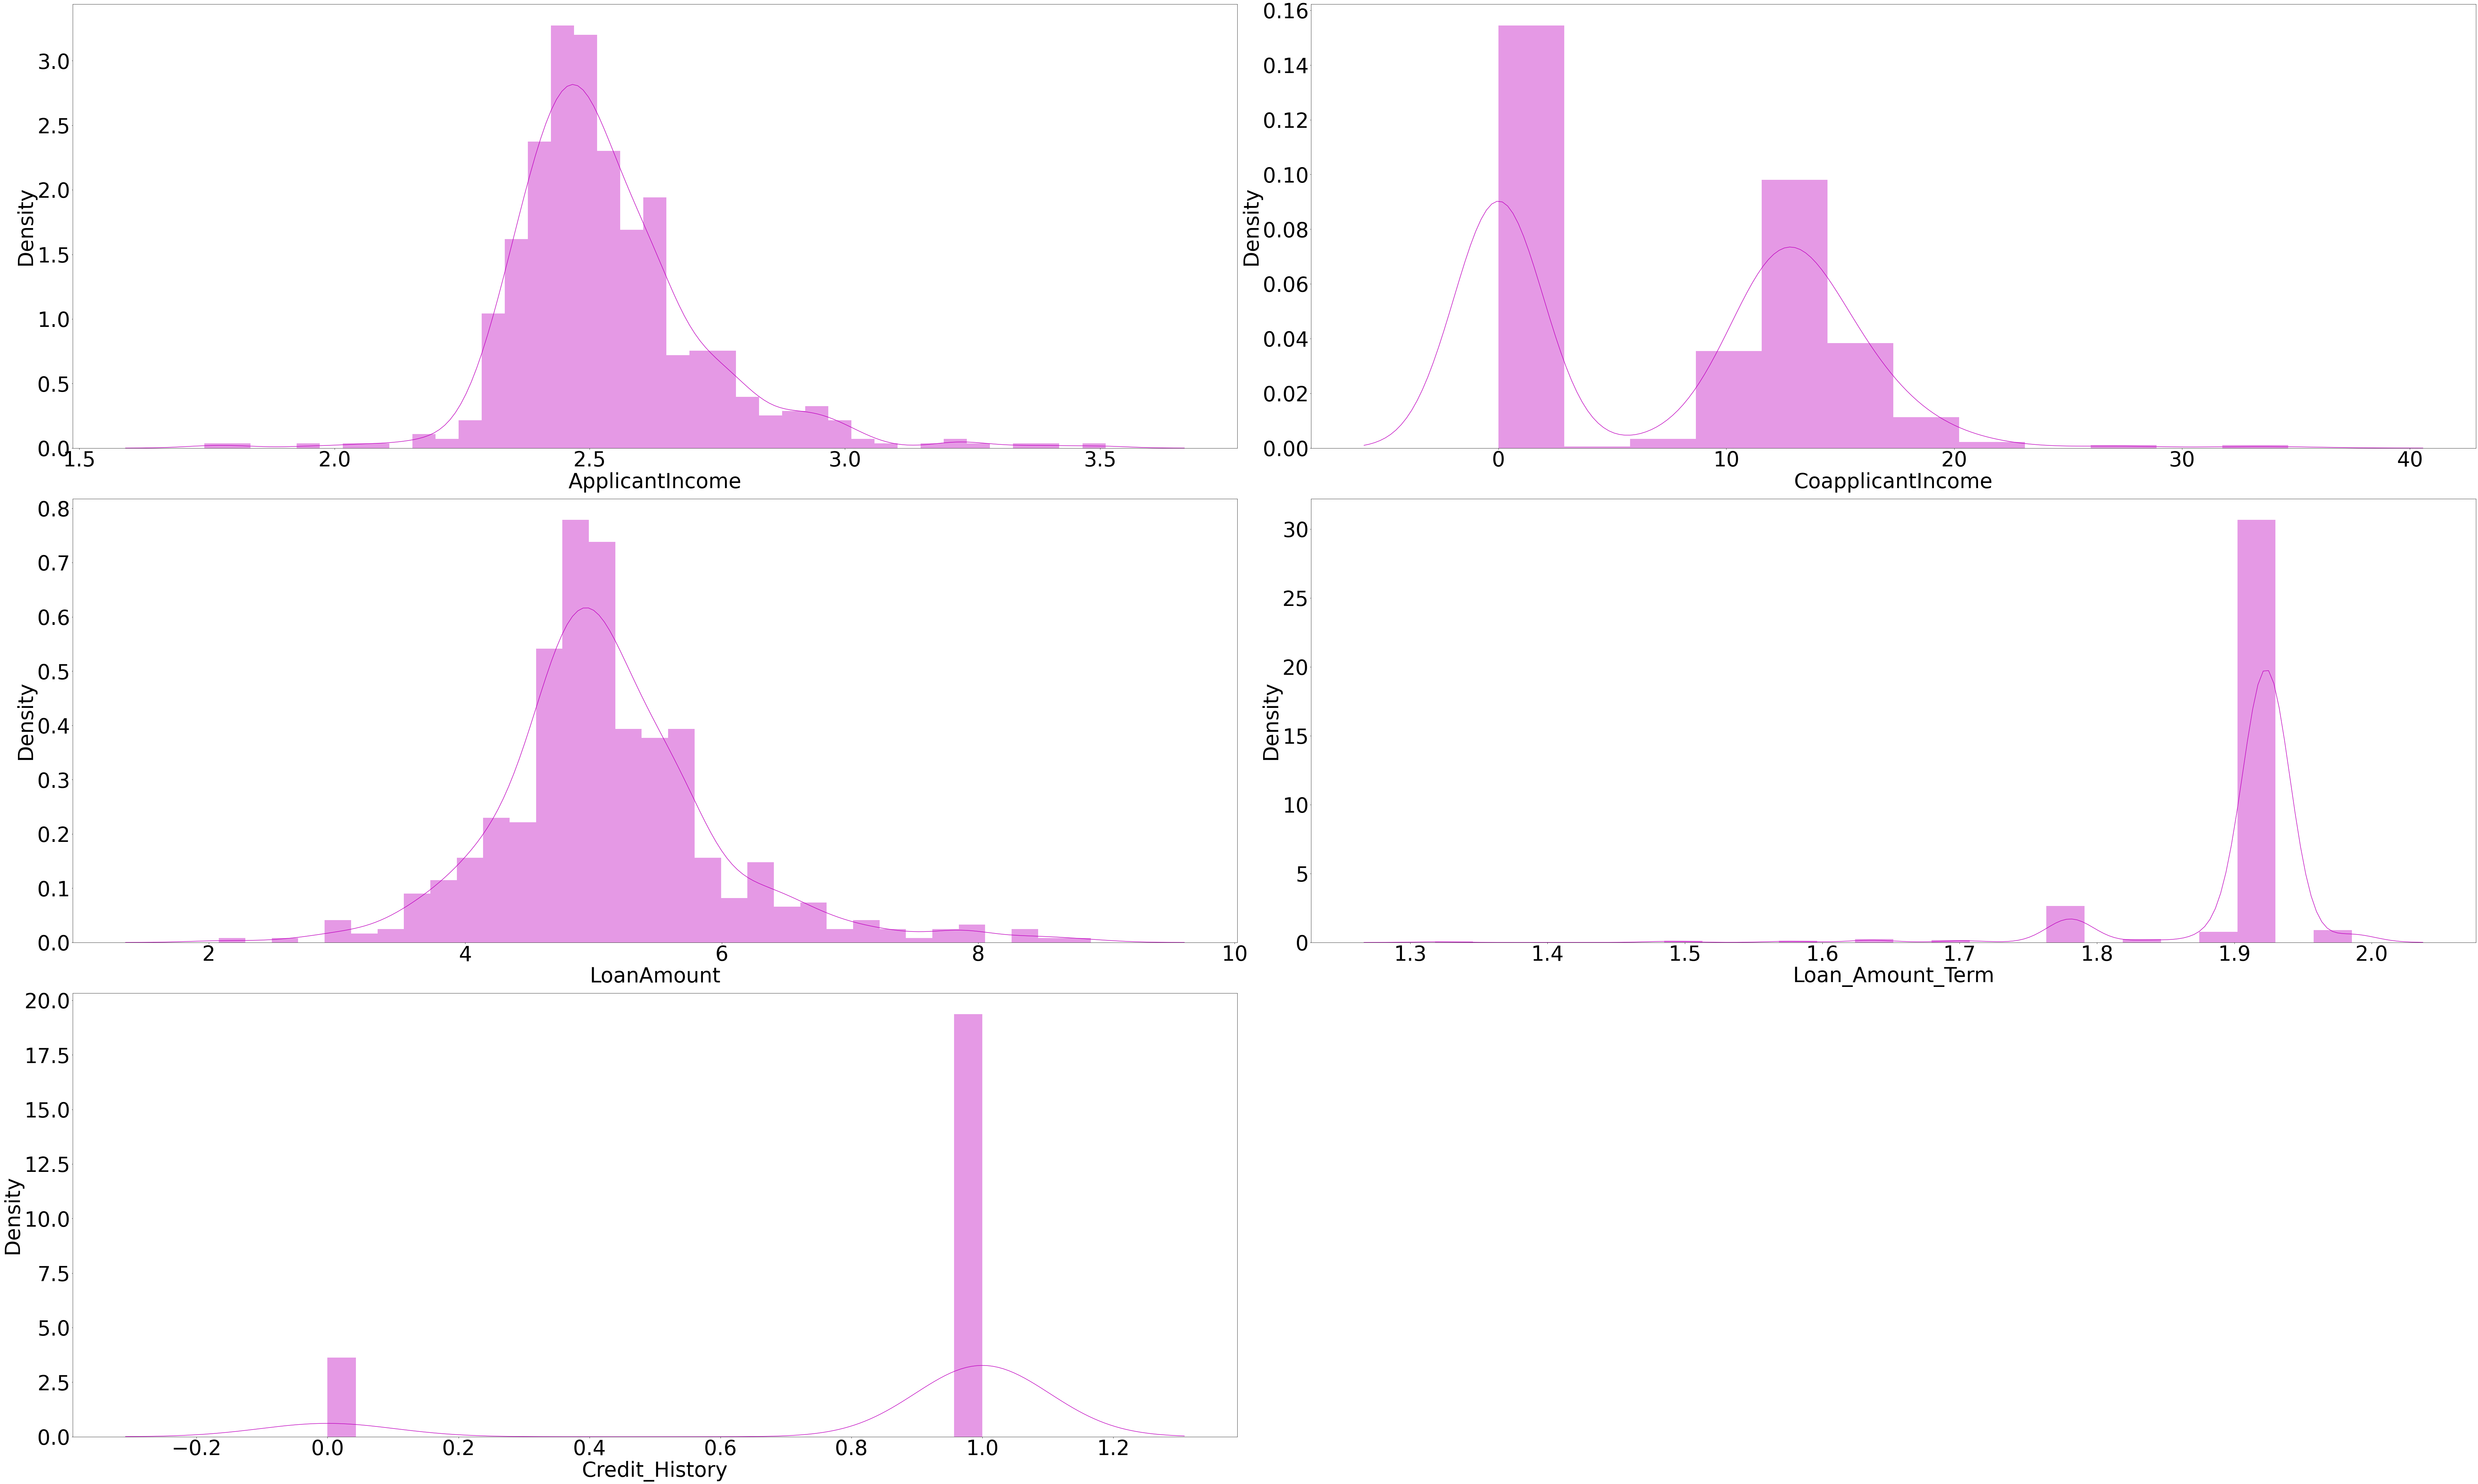

In [22]:
#let's check how the data has been distributed in remaining column
from socket import socket
plt.figure(figsize = (100, 60), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=5:
        ax = plt.subplot(3, 2, plotnumber)
        sns.distplot(L[col], color = "m")
        plt.xlabel(col, fontsize = 60)
        plt.ylabel('Density', fontsize = 60)
        plt.yticks(rotation = 0, fontsize = 60)
        plt.xticks(rotation = 0, fontsize = 60)
    plotnumber+=1
plt.tight_layout()

# Encoding categorical columns

In [23]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in L.columns:
    if L[i].dtypes=='object':
        L[i] = OE.fit_transform(L[i].values.reshape(-1, 1))
L

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,2.621589,0.000000,NaN,1.923241,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,2.551493,11.467457,5.039684,1.923241,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,2.434147,0.000000,4.041240,1.923241,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2.394004,13.310098,4.932424,1.923241,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,2.629024,0.000000,5.204828,1.923241,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2.424995,0.000000,4.140818,1.923241,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,2.520525,0.000000,3.419952,1.780680,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,2.717121,6.214465,6.324704,1.923241,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,2.698320,0.000000,5.718479,1.923241,1.0,2.0,1.0


In [24]:
L.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.000000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.218241,0.140893,2.532991,7.480926,5.120375,1.906315,0.842199,1.037459,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,0.185886,7.108669,0.870312,0.061826,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.744970,0.000000,2.080084,1.317981,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2.422897,0.000000,4.641589,1.923241,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,2.499840,10.592145,5.039684,1.923241,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,2.618888,13.194779,5.517848,1.923241,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,3.510647,34.668156,8.879040,1.985709,1.000000,2.000000,1.000000


# Correlation between target variable and independent variables.

In [25]:
# Checking the correlation between features and the target
cor = L.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.175970,0.049258,-0.009829,0.079770,0.211056,0.134032,-0.058452,0.016337,-0.024556,0.019857
Married,0.369612,1.000000,0.343417,0.014223,0.001909,0.024556,0.283247,0.176410,-0.074850,0.004381,0.002918,0.089280
Dependents,0.175970,0.343417,1.000000,0.059161,0.057867,0.123175,-0.008289,0.166394,-0.079864,-0.050082,0.006828,0.006781
Education,0.049258,0.014223,0.059161,1.000000,-0.012333,-0.183536,0.010615,-0.164577,-0.070296,-0.081822,-0.065243,-0.085884
Self_Employed,-0.009829,0.001909,0.057867,-0.012333,1.000000,0.198469,-0.074975,0.123132,-0.029021,0.003883,-0.031214,-0.002303
ApplicantIncome,0.079770,0.024556,0.123175,-0.183536,0.198469,1.000000,-0.345384,0.551729,-0.016591,0.019684,-0.028653,0.008459
CoapplicantIncome,0.211056,0.283247,-0.008289,0.010615,-0.074975,-0.345384,1.000000,0.162246,-0.000586,-0.003220,-0.052318,0.033582
LoanAmount,0.134032,0.176410,0.166394,-0.164577,0.123132,0.551729,0.162246,1.000000,0.072984,-0.018109,-0.081003,-0.041185
Loan_Amount_Term,-0.058452,-0.074850,-0.079864,-0.070296,-0.029021,-0.016591,-0.000586,0.072984,1.000000,-0.005644,-0.085513,-0.008108
Credit_History,0.016337,0.004381,-0.050082,-0.081822,0.003883,0.019684,-0.003220,-0.018109,-0.005644,1.000000,-0.001969,0.561678


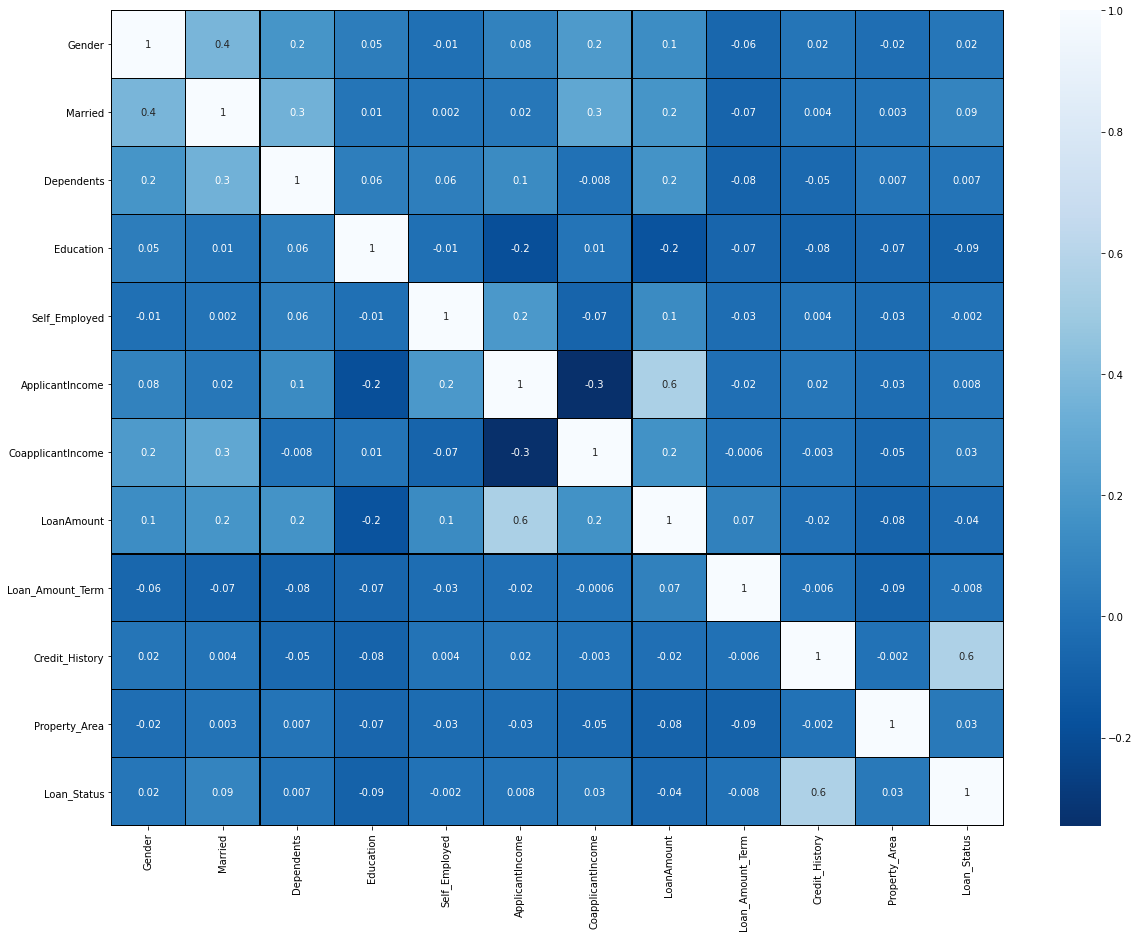

In [26]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(L.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

# Separating features and label

In [27]:
L = L.replace(np.nan,0)

In [28]:
L

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,2.621589,0.000000,0.000000,1.923241,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,2.551493,11.467457,5.039684,1.923241,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,2.434147,0.000000,4.041240,1.923241,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2.394004,13.310098,4.932424,1.923241,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,2.629024,0.000000,5.204828,1.923241,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2.424995,0.000000,4.140818,1.923241,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,2.520525,0.000000,3.419952,1.780680,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,2.717121,6.214465,6.324704,1.923241,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,2.698320,0.000000,5.718479,1.923241,1.0,2.0,1.0


In [29]:
x = L.drop("Loan_Status", axis = 1)
y = L["Loan_Status"]

# Feature Scaling using Standard Scalarization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.505592,-1.357421,-0.737806,-0.528362,-0.392601,0.477016,-1.053225,-3.861173,0.207509,0.540954,1.223298
1,0.505592,0.736691,0.253470,-0.528362,-0.392601,0.099619,0.561256,0.080381,0.207509,0.540954,-1.318513
2,0.505592,0.736691,-0.737806,-0.528362,2.547117,-0.532176,-1.053225,-0.700506,0.207509,0.540954,1.223298
3,0.505592,0.736691,-0.737806,1.892641,-0.392601,-0.748306,0.820678,-0.003508,0.207509,0.540954,1.223298
4,0.505592,-1.357421,-0.737806,-0.528362,-0.392601,0.517047,-1.053225,0.209540,0.207509,0.540954,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-1.977878,-1.357421,-0.737806,-0.528362,-0.392601,-0.581450,-1.053225,-0.622626,0.207509,0.540954,-1.318513
610,0.505592,0.736691,2.236021,-0.528362,-0.392601,-0.067116,-1.053225,-1.186417,-0.282334,0.540954,-1.318513
611,0.505592,0.736691,0.253470,-0.528362,-0.392601,0.991363,-0.178302,1.085399,0.207509,0.540954,1.223298
612,0.505592,0.736691,1.244745,-0.528362,-0.392601,0.890137,-1.053225,0.611268,0.207509,0.540954,1.223298


# Checking Variance Inflation Factor(VIF)

In [31]:
# Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.175087,Gender
1,1.351725,Married
2,1.173346,Dependents
3,1.081285,Education
4,1.043322,Self_Employed
5,1.519261,ApplicantIncome
6,1.417996,CoapplicantIncome
7,1.285548,LoanAmount
8,1.021421,Loan_Amount_Term
9,1.018703,Credit_History


In [32]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

# Oversampling

In [33]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x, y)

In [34]:
# Checking value count of target column
y.value_counts()

0.0    422
1.0    422
Name: Loan_Status, dtype: int64

# Modelling

# Finding the best random state

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu, "at random state", maxRs)

Best accuracy is  0.8543307086614174 at random state 130


# Creating train test split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = maxRs)

# Classification Algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# RandomForestClassifier

In [39]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8385826771653543
[[ 95  29]
 [ 12 118]]
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82       124
         1.0       0.80      0.91      0.85       130

    accuracy                           0.84       254
   macro avg       0.85      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



# Logistic Regression

In [40]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.6968503937007874
[[ 66  58]
 [ 19 111]]
              precision    recall  f1-score   support

         0.0       0.78      0.53      0.63       124
         1.0       0.66      0.85      0.74       130

    accuracy                           0.70       254
   macro avg       0.72      0.69      0.69       254
weighted avg       0.72      0.70      0.69       254



# Support Vector Machine Classifier

In [41]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7519685039370079
[[ 80  44]
 [ 19 111]]
              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72       124
         1.0       0.72      0.85      0.78       130

    accuracy                           0.75       254
   macro avg       0.76      0.75      0.75       254
weighted avg       0.76      0.75      0.75       254



# Gradient Boosting Classifier

In [42]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.7992125984251969
[[ 90  34]
 [ 17 113]]
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       124
         1.0       0.77      0.87      0.82       130

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254



# AdaBoost Classifier

In [44]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8110236220472441
[[ 89  35]
 [ 13 117]]
              precision    recall  f1-score   support

         0.0       0.87      0.72      0.79       124
         1.0       0.77      0.90      0.83       130

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.81       254
weighted avg       0.82      0.81      0.81       254



# Bagging Classifier

In [45]:
# Checking accuracy for Bagging Classifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.7952755905511811
[[ 97  27]
 [ 25 105]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       124
         1.0       0.80      0.81      0.80       130

    accuracy                           0.80       254
   macro avg       0.80      0.79      0.80       254
weighted avg       0.80      0.80      0.80       254



# ExtraTreesClassifier

In [46]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8385826771653543
[[ 97  27]
 [ 14 116]]
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.83       124
         1.0       0.81      0.89      0.85       130

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



In [47]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier

In [48]:
# Checking accuracy for KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
predKNN = KNN.predict(x_test)
print(accuracy_score(y_test, predKNN))
print(confusion_matrix(y_test, predKNN))
print(classification_report(y_test, predKNN))

0.7480314960629921
[[ 89  35]
 [ 29 101]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       124
         1.0       0.74      0.78      0.76       130

    accuracy                           0.75       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.75      0.75      0.75       254



# Extra Trees Classifier is our best Model

Extra Trees Classifier is our best Model because it has highest accuracy score among all models

# Hyper Parameter Tuning

In [49]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy']}

In [50]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [52]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [59]:
GCV.best_params_

{'criterion': 'gini'}

In [60]:
Final_model = ExtraTreesClassifier(criterion = 'gini')
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

83.85826771653542


# Plotting ROC and compare AUC for all the models used

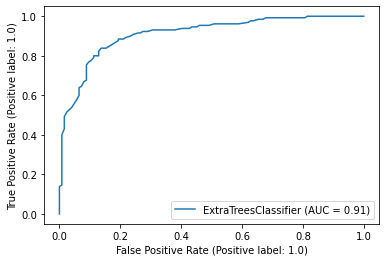

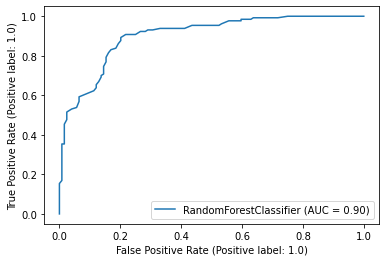

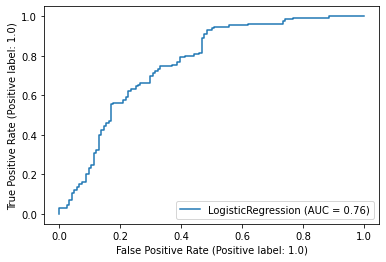

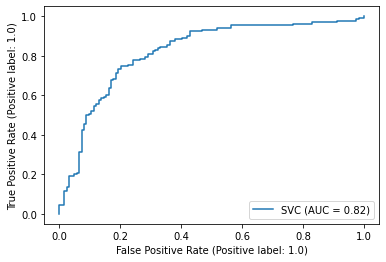

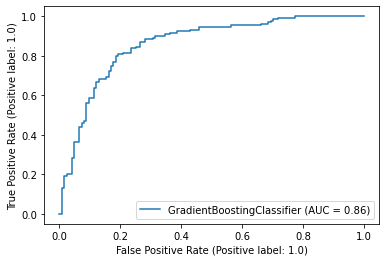

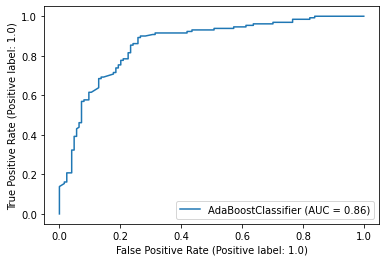

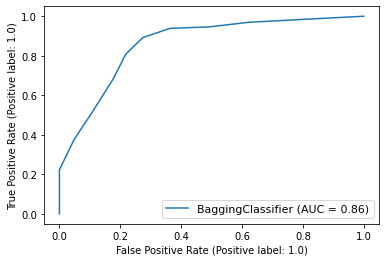

In [61]:
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(ET, x_test, y_test)      #ax -Axes with confusion matrix
RocCurveDisplay.from_estimator(RFC, x_test, y_test)
RocCurveDisplay.from_estimator(LR, x_test, y_test)
RocCurveDisplay.from_estimator(svc, x_test, y_test)
RocCurveDisplay.from_estimator(GB, x_test, y_test)
RocCurveDisplay.from_estimator(ABC, x_test, y_test)
RocCurveDisplay.from_estimator(BC, x_test, y_test)

plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

# Plotting ROC and compare AUC for the best model

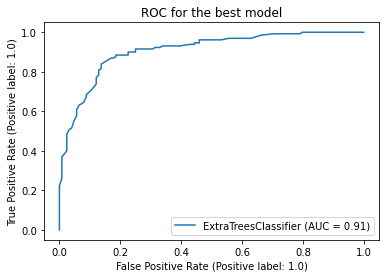

In [62]:
# Let's check the AUC for the best model after hyper parameter tuning
RocCurveDisplay.from_estimator(Final_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the model

In [63]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, "Loan Application Status Prediction.pki")

['Loan Application Status Prediction.pki']

# Predicting the saved model

In [64]:
# Lets Load the saved model and get the predictions
model = joblib.load("Loan Application Status Prediction.pki")

# Prediction
prediction = model.predict(x_test)
prediction

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1.